<a href="https://colab.research.google.com/github/kabachia/colab-notebooks/blob/main/evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [4]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [5]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [6]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8034066713981547

Accuracy

In [8]:
len(y_val)

1409

In [9]:
(y_val == churn_decision).sum()

1132

In [10]:
1132/1409*100

80.34066713981547

In [11]:
thresholds = np.linspace(0, 1, 21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [12]:
scores = []

for t in thresholds:
  churn_decision = (y_pred >= t)
  score = (y_val == churn_decision).mean()
  print(f"{t:.2f}, {score:.3f}")
  scores.append(score)

0.00, 0.274
0.05, 0.510
0.10, 0.591
0.15, 0.667
0.20, 0.710
0.25, 0.737
0.30, 0.760
0.35, 0.773
0.40, 0.785
0.45, 0.793
0.50, 0.803
0.55, 0.801
0.60, 0.795
0.65, 0.786
0.70, 0.765
0.75, 0.744
0.80, 0.735
0.85, 0.726
0.90, 0.726
0.95, 0.726
1.00, 0.726


In [13]:
scores

[0.2739531582682754,
 0.5102909865152591,
 0.5911994322214337,
 0.6671398154719659,
 0.7097232079489,
 0.7374024130589071,
 0.7601135557132718,
 0.772888573456352,
 0.7849538679914834,
 0.7927608232789212,
 0.8034066713981547,
 0.801277501774308,
 0.794889992902768,
 0.7863733144073811,
 0.7650816181689141,
 0.7444996451383961,
 0.7345635202271115,
 0.7260468417317246,
 0.7260468417317246,
 0.7260468417317246,
 0.7260468417317246]

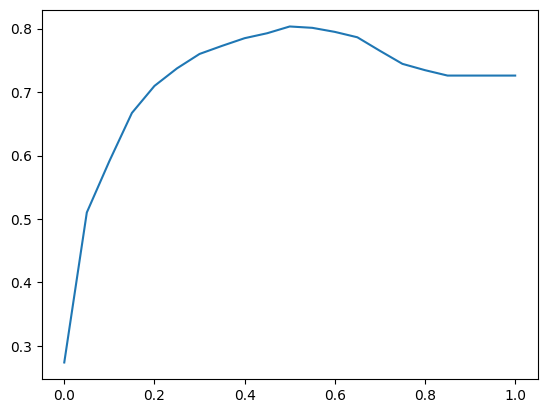

In [14]:
plt.plot(thresholds, scores)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(y_val, y_pred >= 0.5)

0.8034066713981547

In [17]:
scores = []

for t in thresholds:
  score = accuracy_score(y_val, y_pred >= t)
  print(f"{t:.2f}, {score:.3f}")
  scores.append(score)

0.00, 0.274
0.05, 0.510
0.10, 0.591
0.15, 0.667
0.20, 0.710
0.25, 0.737
0.30, 0.760
0.35, 0.773
0.40, 0.785
0.45, 0.793
0.50, 0.803
0.55, 0.801
0.60, 0.795
0.65, 0.786
0.70, 0.765
0.75, 0.744
0.80, 0.735
0.85, 0.726
0.90, 0.726
0.95, 0.726
1.00, 0.726


In [18]:
from collections import Counter

In [19]:
Counter(y_pred >= 1.0)

Counter({False: 1409})

## Confusion table

In [20]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [21]:
threshold = 0.5
predict_positive = (y_pred >= threshold)
predict_negative = (y_pred < threshold)

In [22]:
true_positive = (predict_positive & actual_positive).sum()
true_positive

211

In [23]:
true_negative = (predict_negative & actual_negative).sum()
true_negative

921

In [24]:
false_positive = (predict_positive & actual_negative).sum()
false_positive

102

In [25]:
false_negative = (predict_negative & actual_positive).sum()
false_negative

175

In [26]:
confusion_matrix = np.array([
    [true_negative, false_positive],
    [false_negative, true_positive]
])
confusion_matrix

array([[921, 102],
       [175, 211]])

Convert to percentages

In [27]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

## Precision and recall

In [28]:
(true_positive+true_negative)/(true_positive+true_negative+false_positive+false_negative) # Accuracy

0.8034066713981547

In [29]:
# Precision - Fraction of positive predictions that are correct
p = true_positive / (true_positive + false_positive)
p

0.6741214057507987

In [30]:
# Recall - Fraction of correctly identified positive examples
r = true_positive / (true_positive + false_negative)
r

0.5466321243523317

ROC Curve

In [31]:
true_positive_rate = true_positive / (true_positive + false_negative)
true_positive_rate

0.5466321243523317

In [32]:
false_positive_rate = false_positive / (false_positive + true_negative)
false_positive_rate

0.09970674486803519

In [33]:
scores = []

thresholds = np.linspace(0, 1 , 101)
for threshold in thresholds:
  actual_positive = (y_val == 1)
  actual_negative = (y_val == 0)

  predict_positive = (y_pred >= threshold)
  predict_negative = (y_pred < threshold)

  true_positive = (predict_positive & actual_positive).sum()
  true_negative = (predict_negative & actual_negative).sum()

  false_positive = (predict_positive & actual_negative).sum()
  false_negative = (predict_negative & actual_positive).sum()

  scores.append(
      (threshold, true_positive, false_positive, false_negative, true_negative)
      )



In [34]:
scores

[(0.0, 386, 1023, 0, 0),
 (0.01, 385, 910, 1, 113),
 (0.02, 384, 829, 2, 194),
 (0.03, 383, 766, 3, 257),
 (0.04, 381, 715, 5, 308),
 (0.05, 379, 683, 7, 340),
 (0.06, 377, 660, 9, 363),
 (0.07, 371, 640, 15, 383),
 (0.08, 371, 611, 15, 412),
 (0.09, 369, 580, 17, 443),
 (0.1, 366, 556, 20, 467),
 (0.11, 365, 528, 21, 495),
 (0.12, 364, 511, 22, 512),
 (0.13, 360, 476, 26, 547),
 (0.14, 355, 451, 31, 572),
 (0.15, 351, 434, 35, 589),
 (0.16, 347, 420, 39, 603),
 (0.17, 346, 400, 40, 623),
 (0.18, 343, 383, 43, 640),
 (0.19, 338, 368, 48, 655),
 (0.2, 333, 356, 53, 667),
 (0.21, 328, 340, 58, 683),
 (0.22, 323, 322, 63, 701),
 (0.23, 320, 313, 66, 710),
 (0.24, 315, 304, 71, 719),
 (0.25, 309, 293, 77, 730),
 (0.26, 303, 281, 83, 742),
 (0.27, 303, 270, 83, 753),
 (0.28, 295, 255, 91, 768),
 (0.29, 291, 244, 95, 779),
 (0.3, 284, 236, 102, 787),
 (0.31, 280, 230, 106, 793),
 (0.32, 278, 226, 108, 797),
 (0.33, 276, 221, 110, 802),
 (0.34, 274, 212, 112, 811),
 (0.35000000000000003, 272,

In [35]:
columns = ['threshold', 'true_positive', 'false_positive', 'false_negative', 'true_negative']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,threshold,true_positive,false_positive,false_negative,true_negative
0,0.00,386,1023,0,0
1,0.01,385,910,1,113
2,0.02,384,829,2,194
3,0.03,383,766,3,257
4,0.04,381,715,5,308
...,...,...,...,...,...
96,0.96,0,0,386,1023
97,0.97,0,0,386,1023
98,0.98,0,0,386,1023
99,0.99,0,0,386,1023


In [36]:
df_scores[::10]

,threshold,true_positive,false_positive,false_negative,true_negative
0,0.0,386,1023,0,0
10,0.1,366,556,20,467
20,0.2,333,356,53,667
30,0.3,284,236,102,787
40,0.4,249,166,137,857
50,0.5,211,102,175,921
60,0.6,150,53,236,970
70,0.7,75,20,311,1003
80,0.8,13,1,373,1022
90,0.9,0,0,386,1023


In [37]:
df_scores['true_positive_rate'] = df_scores.true_positive / (df_scores.true_positive + df_scores.false_negative)
df_scores['false_positive_rate'] = df_scores.false_positive / (df_scores.false_positive + df_scores.true_negative)

In [38]:
df_scores[::10]

,threshold,true_positive,false_positive,false_negative,true_negative,true_positive_rate,false_positive_rate
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,556,20,467,0.948187,0.543500
20,0.2,333,356,53,667,0.862694,0.347996
30,0.3,284,236,102,787,0.735751,0.230694
40,0.4,249,166,137,857,0.645078,0.162268
50,0.5,211,102,175,921,0.546632,0.099707
60,0.6,150,53,236,970,0.388601,0.051808
70,0.7,75,20,311,1003,0.194301,0.019550
80,0.8,13,1,373,1022,0.033679,0.000978
90,0.9,0,0,386,1023,0.000000,0.000000


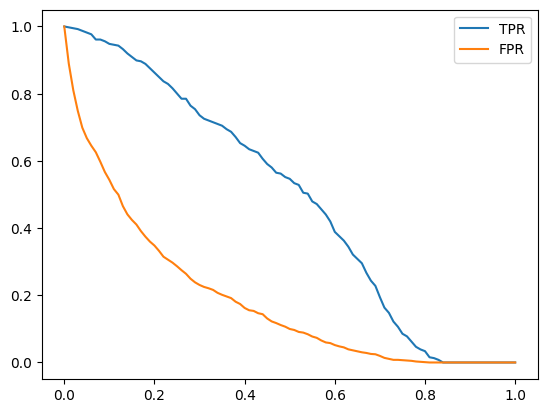

In [39]:
plt.plot(df_scores.threshold, df_scores.true_positive_rate, label='TPR')
plt.plot(df_scores.threshold, df_scores.false_positive_rate, label='FPR')
plt.legend()

Random model

In [40]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))
y_rand

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, ...,
       7.73916250e-01, 3.34276405e-01, 8.89982208e-02])

In [41]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [42]:
def tpr_fpr_dataframe(y_val, y_pred):
  scores = []

  thresholds = np.linspace(0, 1 , 101)

  for threshold in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= threshold)
    predict_negative = (y_pred < threshold)

    true_positive = (predict_positive & actual_positive).sum()
    true_negative = (predict_negative & actual_negative).sum()

    false_positive = (predict_positive & actual_negative).sum()
    false_negative = (predict_negative & actual_positive).sum()

    scores.append(
        (threshold, true_positive, false_positive, false_negative, true_negative)
        )

  columns = ['threshold', 'true_positive', 'false_positive', 'false_negative', 'true_negative']
  df_scores = pd.DataFrame(scores, columns=columns)

  df_scores['true_positive_rate'] = df_scores.true_positive / (df_scores.true_positive + df_scores.false_negative)
  df_scores['false_positive_rate'] = df_scores.false_positive / (df_scores.false_positive + df_scores.true_negative)

  return df_scores

In [43]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand[::10]

,threshold,true_positive,false_positive,false_negative,true_negative,true_positive_rate,false_positive_rate
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


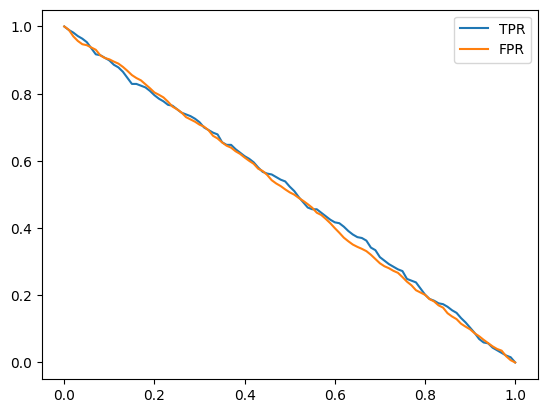

In [44]:
plt.plot(df_rand.threshold, df_rand.true_positive_rate, label='TPR')
plt.plot(df_rand.threshold, df_rand.false_positive_rate, label='FPR')
plt.legend()

Ideal model

In [45]:
num_neg = (y_val == 0).sum()
num_pos = (y_val ==1).sum()
num_neg, num_pos

(1023, 386)

In [46]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [47]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [48]:
1 - y_val.mean()

0.7260468417317246

In [49]:
((y_ideal_pred >= 0.7260468417317246) == y_ideal).mean()

1.0

In [50]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

,threshold,true_positive,false_positive,false_negative,true_negative,true_positive_rate,false_positive_rate
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


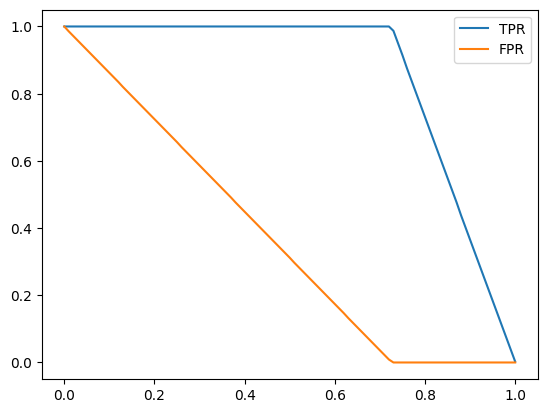

In [51]:
plt.plot(df_ideal.threshold, df_ideal.true_positive_rate, label='TPR')
plt.plot(df_ideal.threshold, df_ideal.false_positive_rate, label='FPR')
plt.legend()

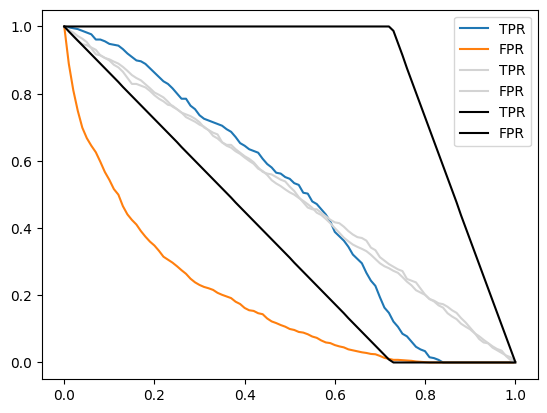

In [52]:
# Actual model
plt.plot(
    df_scores.threshold, df_scores.true_positive_rate, label='TPR')
plt.plot(
    df_scores.threshold, df_scores.false_positive_rate, label='FPR')
# Random model
plt.plot(
    df_rand.threshold, df_rand.true_positive_rate, label='TPR', color='lightgray')
plt.plot(
    df_rand.threshold, df_rand.false_positive_rate, label='FPR', color='lightgray')
# Ideal model
plt.plot(
    df_ideal.threshold, df_ideal.true_positive_rate, label='TPR', color='black')
plt.plot(
    df_ideal.threshold, df_ideal.false_positive_rate, label='FPR', color='black')

plt.legend()

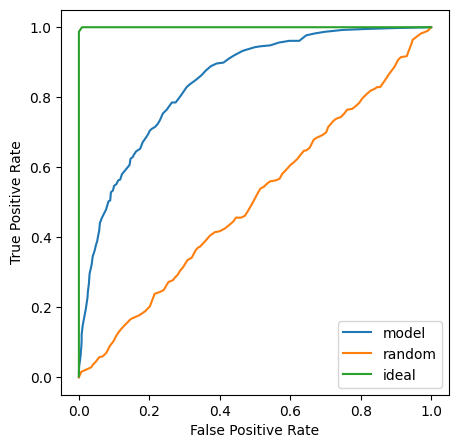

In [53]:
plt.figure(figsize=(5, 5)) # Display equal size graph

plt.plot(df_scores.false_positive_rate, df_scores.true_positive_rate, label='model')
plt.plot(df_rand.false_positive_rate, df_rand.true_positive_rate, label='random')
plt.plot(df_ideal.false_positive_rate, df_ideal.true_positive_rate, label='ideal')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

## Using sklearn roc_curve

In [54]:
from sklearn.metrics import roc_curve

In [55]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

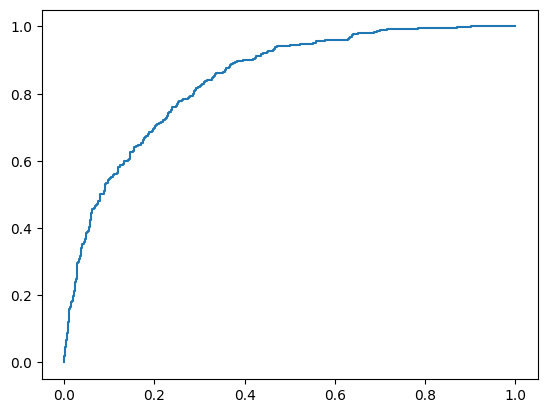

In [56]:
plt.plot(fpr, tpr)

## ROC AUC

In [57]:
from sklearn.metrics import auc

In [58]:
auc(fpr, tpr)

0.8438834272864024

In [59]:
auc(df_scores.false_positive_rate, df_scores.true_positive_rate)

0.8435871332411529

In [60]:
auc(df_ideal.false_positive_rate, df_ideal.true_positive_rate)

0.9999430203759136

In [61]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.8438834272864024

In [62]:
from sklearn.metrics import roc_auc_score

In [63]:
roc_auc_score(y_val, y_pred)

0.8438834272864024

## Cross validation

In [91]:
def train(df_train, y_train, C=1.0):
  dicts = df_train[categorical + numerical].to_dict(orient='records')

  dv = DictVectorizer(sparse=False)
  X_train = dv.fit_transform(dicts)

  model = LogisticRegression(C=C, max_iter=1000)
  model.fit(X_train, y_train)

  return dv, model

In [94]:
dv, model = train(df_train, y_train, C=1)

In [67]:
def predict(df, dv, model):
  dicts = df[categorical + numerical].to_dict(orient='records')

  X = dv.transform(dicts)
  y_pred = model.predict_proba(X)[:,1]

  return y_pred

In [68]:
y_pred = predict(df_val, dv, model)

In [69]:
y_pred

array([0.00889774, 0.20477037, 0.21275457, ..., 0.13567362, 0.79937149,
       0.83711789])

In [70]:
from sklearn.model_selection import KFold

In [71]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [72]:
train_idx, val_idx = next(kfold.split(df_full_train))

In [73]:
len(train_idx), len(val_idx)

(5070, 564)

In [74]:
len(df_full_train)

5634

In [75]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]
df_val

In [77]:
!pip install tqdm

In [78]:
from tqdm.auto import tqdm

In [79]:
scores = []
for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
  df_train = df_full_train.iloc[train_idx]
  df_val = df_full_train.iloc[val_idx]

  y_train = df_train.churn.values
  y_val = df_val.churn.values

  dv,model = train(df_train, y_train)
  y_pred = predict(df_val, dv, model)

  auc = roc_auc_score(y_val, y_pred)
  scores.append(auc)


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [80]:
scores

[0.8479398247539081,
 0.8411045792079207,
 0.8557214756739697,
 0.8341782569335857,
 0.8245812655086848,
 0.8342657342657342,
 0.8413057635949203,
 0.8186669829222013,
 0.8452942048317771,
 0.8629289771772378]

In [81]:
np.mean(scores), np.std(scores)

(0.840598706486994, 0.012739396844826056)

In [95]:
n_splits = 5

for C in [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100]:
  scores = []

  kfold = KFold(n_splits=10, shuffle=True, random_state=1)

  for train_idx, val_idx in tqdm(kfold.split(df_full_train), total=n_splits):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.churn.values
    y_val = df_val.churn.values

    dv,model = train(df_train, y_train, C=C)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
  print(f"{C}  {np.mean(scores):.3f} {np.std(scores):.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

0.001  0.826 0.012


  0%|          | 0/5 [00:00<?, ?it/s]

0.01  0.841 0.012


  0%|          | 0/5 [00:00<?, ?it/s]

0.1  0.841 0.012


  0%|          | 0/5 [00:00<?, ?it/s]

0.5  0.841 0.011


  0%|          | 0/5 [00:00<?, ?it/s]

1  0.841 0.013


  0%|          | 0/5 [00:00<?, ?it/s]

5  0.841 0.013


  0%|          | 0/5 [00:00<?, ?it/s]

10  0.841 0.012


  0%|          | 0/5 [00:00<?, ?it/s]

100  0.841 0.012


In [97]:
dv,model = train(df_full_train, df_full_train.churn.values, C=1)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8572386167896259